In [1]:
import numpy as np                 
import matplotlib.pyplot as plt    
import random                      

from keras.datasets import mnist   
from keras.models import Sequential
import tensorflow as tf
import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils                        

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


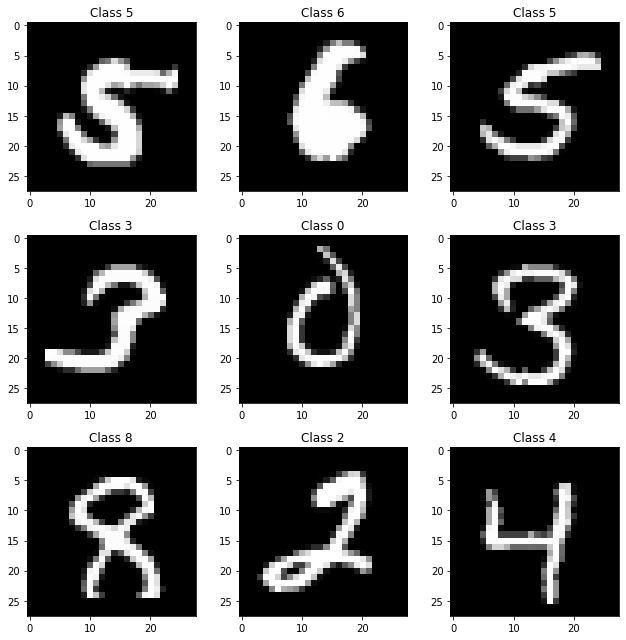

In [3]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [4]:
# X_train = X_train.reshape(60000, 784) 
# X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [5]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
# The Sequential model is a linear stack of layers and is very common.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, validation_split=0.2,
          verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.9028 - accuracy: 0.6779 - val_loss: 0.1186 - val_accuracy: 0.9690
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.4120 - accuracy: 0.8561 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3033 - accuracy: 0.8974 - val_loss: 0.0566 - val_accuracy: 0.9838
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2588 - accuracy: 0.9114 - val_loss: 0.0459 - val_accuracy: 0.9872
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2364 - accuracy: 0.9180 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2136 - accuracy: 0.9254 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2080 - accuracy: 0.9280 - val_loss: 0.0412 - val_accuracy: 0.9885
Epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


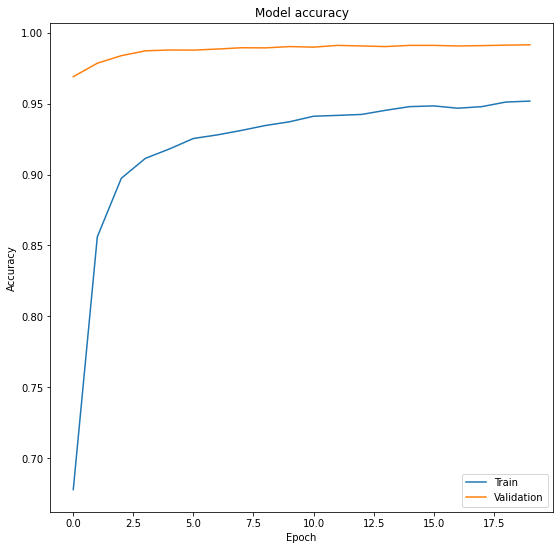

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()